In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
RANDOM_STATE = 331

In [3]:
dataframe = pd.read_csv('./backend_data/PPWID_100_10.csv')

In [4]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0,23.231709,15.670732,21.585367,0.076355,1.044250,0.022095,0.000036,-0.000033,-0.000050,...,-0.000043,-12.865854,-60.304878,5.000000,0.049377,0.928711,0.367981,0.000036,-0.000035,-0.000041
1,0,-41.951221,-58.963417,-17.682928,0.066284,0.838867,0.053528,0.000036,-0.000036,-0.000034,...,-0.000038,-23.048780,-6.890244,-10.426829,0.059082,1.296509,-0.158020,0.000035,-0.000035,-0.000041
2,0,-9.634147,101.890244,-4.390244,0.024902,1.262085,-0.118713,0.000033,-0.000033,-0.000048,...,-0.000041,-46.463417,-53.963417,-18.109756,0.052124,0.760864,0.077332,0.000030,-0.000034,-0.000037
3,0,-47.804878,-12.256098,-0.182927,0.062622,0.752625,0.041138,0.000030,-0.000033,-0.000036,...,-0.000041,56.036587,66.341461,0.548781,0.144348,0.941528,0.337585,0.000034,-0.000035,-0.000039
4,0,45.792683,83.597565,15.670732,-0.018799,0.574280,0.092041,0.000035,-0.000036,-0.000040,...,-0.000040,9.268292,-25.365854,-0.487805,-0.033447,1.066467,-0.007202,0.000038,-0.000035,-0.000042


In [5]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [6]:
def MLPClassification(X, y, hidden_layer_sizes=[64, 32, 16]):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.25)

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred,average=None).mean()
    r = recall_score(y_test, y_pred, average=None).mean()

    print("Accuracy: %.3f \nPrecision: %.3f \nRecall: %.3f" % (acc, p, r) )

    cm = confusion_matrix(y_test, y_pred, normalize = 'true')

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=['Boxing', 'Jumping_jacks', 'Other', 'Squats']
    )

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax)
    
    return acc, p, r

- - - - - - - - - - - - -
Hidden layer sizes [32, 16, 8]


C:\Users\Wojtek\anaconda3\envs\aied\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.977 
Precision: 0.717 
Recall: 0.742
- - - - - - - - - - - - -
Hidden layer sizes [64, 32, 16]
Accuracy: 0.984 
Precision: 0.867 
Recall: 0.994
- - - - - - - - - - - - -
Hidden layer sizes [128, 64, 32]
Accuracy: 0.984 
Precision: 0.988 
Recall: 0.992


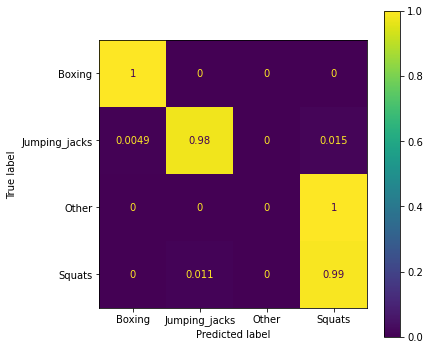

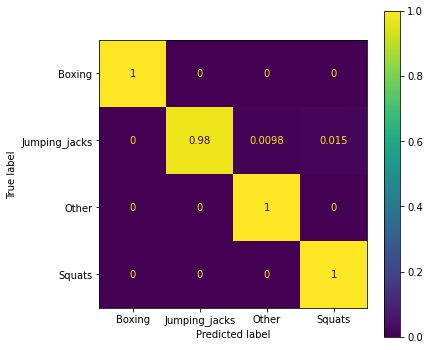

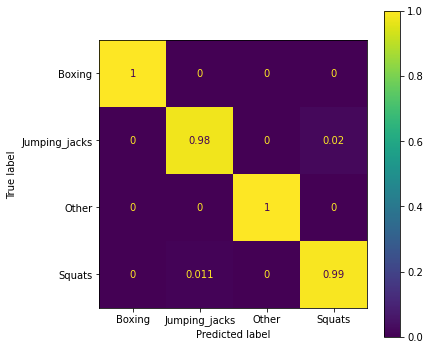

In [7]:
layers_list = [
    [32, 16, 8],
    [64, 32, 16],
    [128, 64, 32],
]

accs = []
pres = []
recs = []

for layers in layers_list:
    print("- - - - - - - - - - - - -")
    print("Hidden layer sizes", layers)
    
    acc, p, r = MLPClassification(X, y, layers)
    
    accs.append(acc)
    pres.append(p)
    recs.append(r)